# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [275]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        


In [276]:
df_flights.shape

(271940, 20)

In [277]:
# Identify any null or missing data, and impute appropriate replacement values.
#finding the null values 
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [278]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [279]:
#DepDel15 is having null values 
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

DepDelay
Mean :10.350448628373906
Median:-1.0
Mode:-3
Std:35.673709956671146
Min :-63
Max:1425


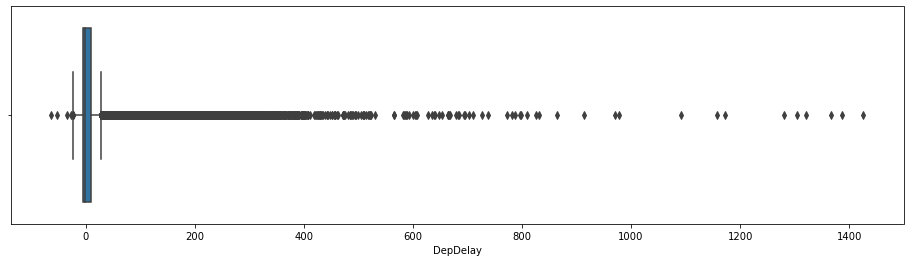

ArrDelay
Mean :6.496649996322718
Median:-3.0
Mode:0
Std:38.23033101550244
Min :-75
Max:1440


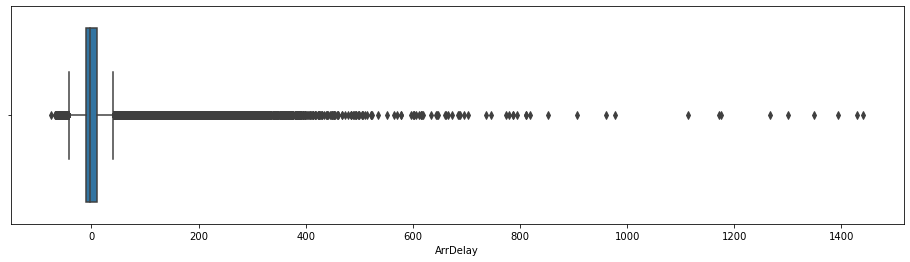

In [280]:
#Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
import matplotlib.pyplot as plt 
import seaborn as sns

def distribution_stats(var):
    plt.figure(figsize=(16,4))
    print(f'Mean :{var.mean()}\nMedian:{var.median()}\nMode:{var.mode()[0]}\nStd:{var.std()}')
    print(f'Min :{var.min()}\nMax:{var.max()}')
    sns.boxplot(x=var)
    plt.show()

print('DepDelay')
distribution_stats(df_flights.DepDelay)
print('ArrDelay')
distribution_stats(df_flights.ArrDelay)

#Expected Result
# DepDelay 
# Minimum:-63.00
# Mean:10.35
# Median:-1.00
# Mode:-3.00
# Maximum:1425.00

# ArrDelay 
# Minimum:-75.00
# Mean:6.50
# Median:-3.00
# Mode:0.00
# Maximum:1440.00

# Removing the Outliers

In [252]:
df_flights.ArrDelay.quantile(0.01),df_flights.ArrDelay.quantile(0.90),df_flights.DepDelay.quantile(0.01),df_flights.DepDelay.quantile(0.90)

(-33.0, 38.0, -12.0, 37.0)

In [281]:
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)

ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)

# Trim outliers for DepDelay based on 1% and 90% percentiles
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]


DepDelay
Mean :1.2884174751492747
Median:-1.0
Mode:-3
Std:9.153171153318336
Min :-11
Max:36


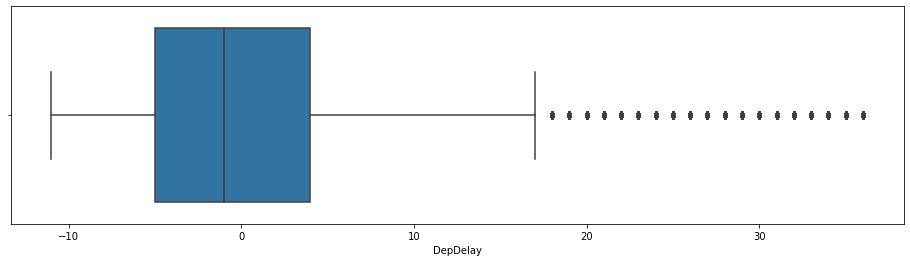

ArrDelay
Mean :-3.1036660675803445
Median:-5.0
Mode:0
Std:12.946277420755093
Min :-32
Max:37


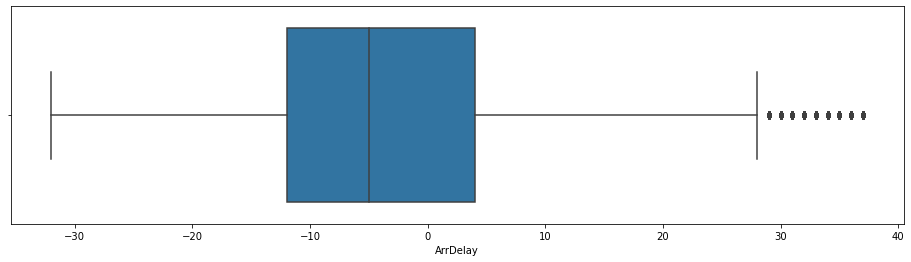

In [284]:
print('DepDelay')
distribution_stats(df_flights.DepDelay)
print('ArrDelay')
distribution_stats(df_flights.ArrDelay)

# Explore the cleaned data.
- Determine the distribution of the DepDelay and ArrDelay columns.
- Use statistics, aggregate functions, and visualizations to answer the following questions:
- What are the average (mean) departure and arrival delays?
- How do the carriers compare in terms of arrival delay performance?
- Is there a noticable difference in arrival delays for different days of the week?
- Which departure airport has the highest average departure delay?
- Do late departures tend to result in longer arrival delays than on-time departures?
- Which route (from origin airport to destination airport) has the most late arrivals?
- Which route has the highest average arrival delay?

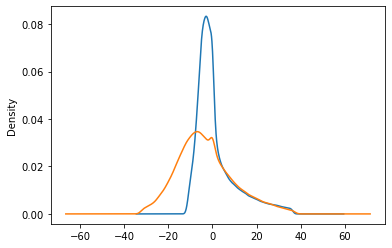

In [285]:
#Determine the distribution of the DepDelay and ArrDelay columns.
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    df_flights[col].plot.density()

In [287]:
# What are the average (mean) departure and arrival delays?
df_flights[delayFields].mean()

DepDelay    1.288417
ArrDelay   -3.103666
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

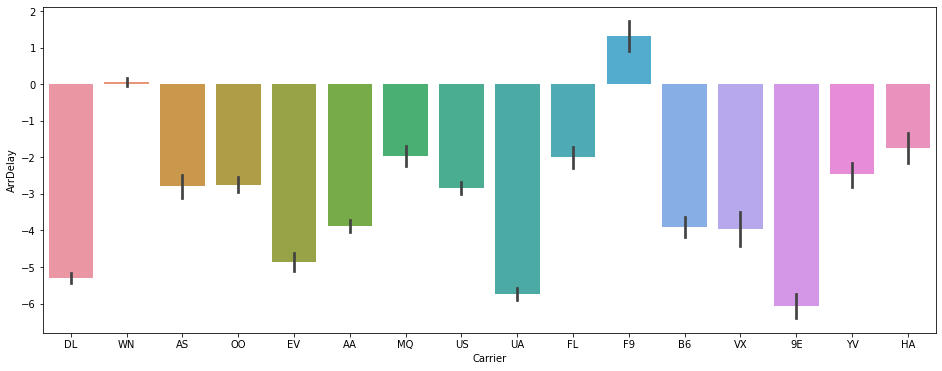

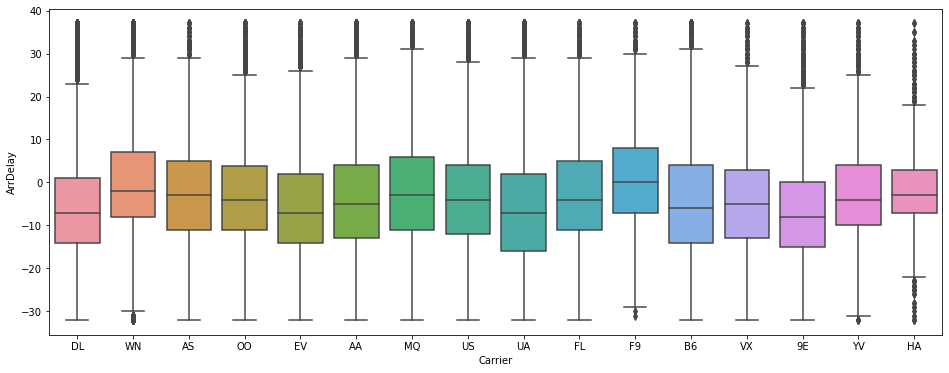

In [295]:

plt.figure(figsize=(16,6))
sns.barplot(data=df_flights, x=df_flights.Carrier,y=df_flights.ArrDelay)
plt.show()
plt.figure(figsize=(16,6))
sns.boxplot(data=df_flights,x=df_flights.Carrier,y=df_flights.ArrDelay)
plt.show()

### Is there a noticable difference in arrival delays for different days of the week?

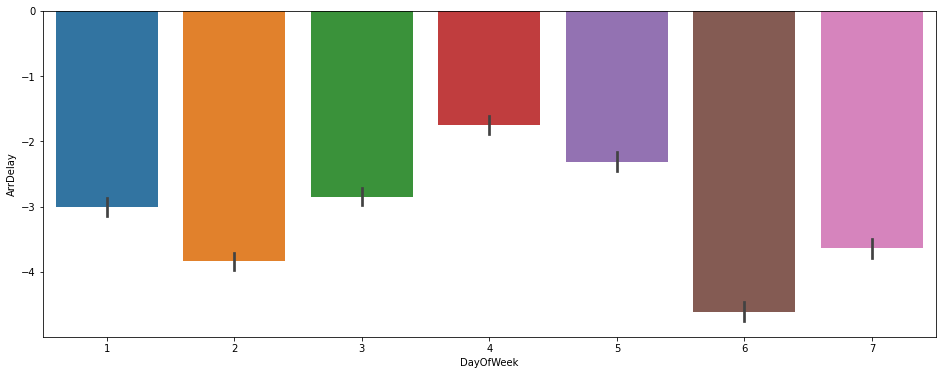

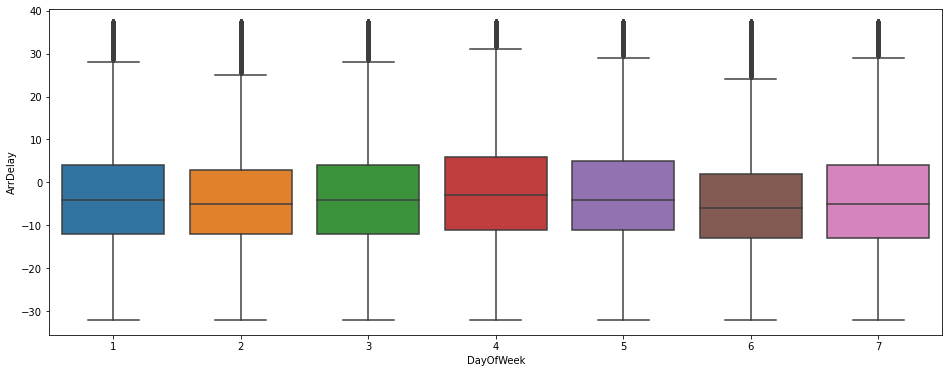

In [297]:
plt.figure(figsize=(16,6))
sns.barplot(data=df_flights, x=df_flights.DayOfWeek,y=df_flights.ArrDelay)
plt.show()
plt.figure(figsize=(16,6))
sns.boxplot(data=df_flights,x=df_flights.DayOfWeek,y=df_flights.ArrDelay)
plt.show()

### Which departure airport has the highest average departure delay?

In [298]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

<AxesSubplot:xlabel='OriginAirportName'>

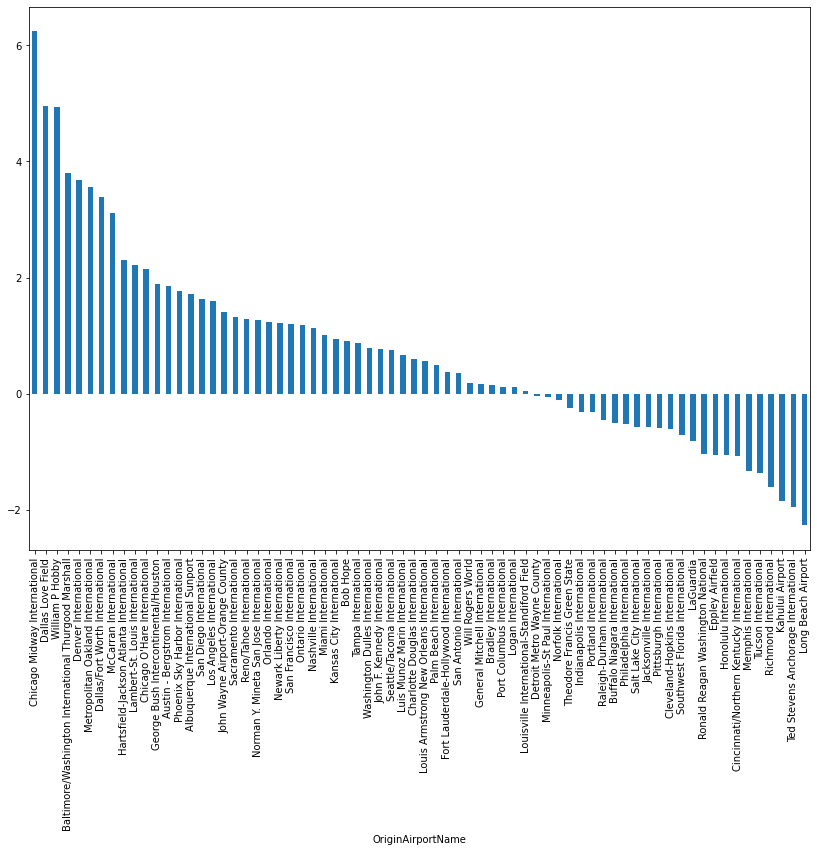

In [320]:
highest_avg_DepDelay=df_flights.groupby('OriginAirportName').mean()['DepDelay'].sort_values(ascending=False)
highest_avg_DepDelay.plot(kind = "bar", figsize=(14,10))

### Do late departures tend to result in longer arrival delays than on-time departures?

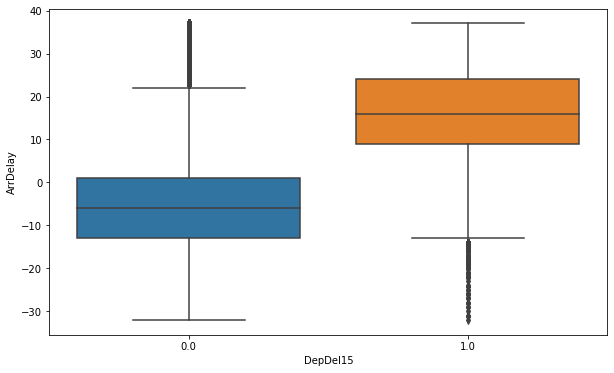

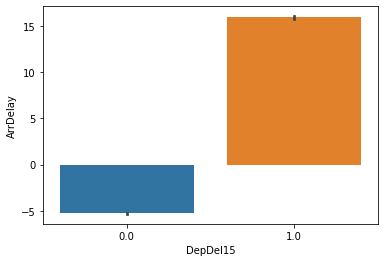

In [324]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_flights,x=df_flights.DepDel15,y=df_flights.ArrDelay)
plt.show()
sns.barplot(data=df_flights,x=df_flights.DepDel15,y=df_flights.ArrDelay)
plt.show()

### Which route (from origin airport to destination airport) has the most **late** arrivals?

In [326]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [340]:
# showing top 5
print(df_flights.groupby(['OriginAirportName','DestAirportName']).sum()['ArrDel15'].sort_values(ascending=False)[:5])

OriginAirportName            DestAirportName                         
San Francisco International  Los Angeles International                   146
Los Angeles International    San Francisco International                 123
McCarran International       Los Angeles International                    90
LaGuardia                    Hartsfield-Jackson Atlanta International     88
Los Angeles International    McCarran International                       80
Name: ArrDel15, dtype: int64


### Which route has the highest average arrival delay?

In [339]:
# showing the top 5
print(df_flights.groupby(['OriginAirportName','DestAirportName']).mean()['ArrDelay'].sort_values(ascending=False)[:5])

OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Cleveland-Hopkins International            Palm Beach International             18.000000
Denver International                       Raleigh-Durham International         14.153846
Charlotte Douglas International            General Mitchell International       13.500000
Cleveland-Hopkins International            Philadelphia International           12.800000
Name: ArrDelay, dtype: float64
